# Correlation similarity metrics and time series

In [2]:
import pandas as pd
df = pd.read_csv("dow_jones_index.data")
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


### convert the closing price to a number

In [3]:
df.close = df.close.apply( lambda x: float(x[1:]))

### convert the date

In [4]:
import datetime
df.date = df.date.apply( lambda x: datetime.\
                        datetime(int(x.split('/')[2]),int(x.split('/')[0]),int(x.split('/')[1])))

In [5]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


# Make a pivot table to place the closing prices for each week as columns and individual stocks as rows 

In [6]:
df_pivot = df.pivot('stock','date','close').reset_index()
df_pivot.head()

date,stock,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,2011-02-04 00:00:00,2011-02-11 00:00:00,2011-02-18 00:00:00,2011-02-25 00:00:00,2011-03-04 00:00:00,...,2011-04-21 00:00:00,2011-04-29 00:00:00,2011-05-06 00:00:00,2011-05-13 00:00:00,2011-05-20 00:00:00,2011-05-27 00:00:00,2011-06-03 00:00:00,2011-06-10 00:00:00,2011-06-17 00:00:00,2011-06-24 00:00:00
0,AA,16.42,15.97,15.79,16.13,17.14,17.37,17.28,16.68,16.58,...,16.97,17.00,17.15,17.10,16.26,16.48,15.92,15.28,14.72,15.23
1,AXP,44.36,46.25,46.00,43.86,43.82,46.75,45.53,43.53,43.72,...,47.11,49.08,50.20,49.49,51.19,51.13,49.28,47.74,48.50,48.34
2,BA,69.38,70.07,71.68,69.23,71.38,72.14,73.04,72.30,71.80,...,75.44,79.78,79.31,79.03,77.52,76.99,74.84,72.69,74.16,71.26
3,BAC,14.25,15.25,14.25,13.60,14.29,14.77,14.75,14.20,14.12,...,12.31,12.28,12.31,11.93,11.58,11.69,11.28,10.80,10.68,10.52
4,CAT,93.73,94.01,92.75,95.68,99.59,103.54,105.86,102.00,103.04,...,109.42,115.41,110.34,106.33,104.33,104.60,101.10,96.79,95.95,100.01


## calculate the correlation between these time series of stock prices by selecting the second column to end columns of the data frame for each row, calculating the pairwise correlations distance metric, and visualizing it using MDS

In [13]:
import matplotlib
matplotlib.style.use('ggplot')

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


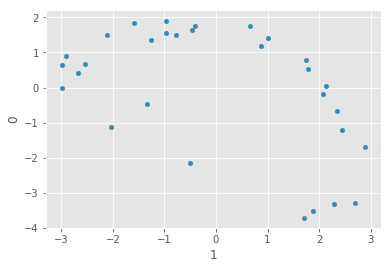

In [12]:
import numpy as np
from sklearn.manifold import MDS
% matplotlib inline
correlations = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(correlations)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


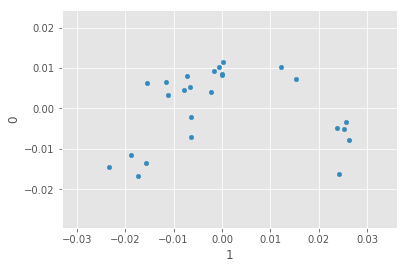

In [15]:
import scipy.stats
correlations2 = scipy.stats.spearmanr(np.float64(np.array(df_pivot)[:,1:]))
mds_coords = MDS().fit_transform(correlations2.correlation)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

## Use the FastDTW algorithm to compare the stocks data and plot the results again using MDS

In [17]:
from fastdtw import fastdtw
dtw_matrix = np.zeros(shape=(df_pivot.shape[0],df_pivot.shape[0]))
for i in np.arange(0,df_pivot.shape[0]):
    for j in np.arange(i+1,df_pivot.shape[0]):
        dtw_matrix[i,j] = fastdtw(df_pivot.iloc[i,2:],df_pivot.iloc[j,2:])[0]

In [18]:
dtw_matrix+=dtw_matrix.transpose()

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


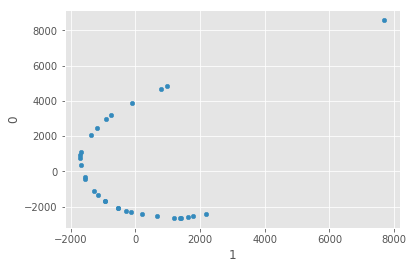

In [19]:
mds_coords = MDS().fit_transform(dtw_matrix)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0) 